In [90]:
#perform a data cleaning and exploratory data analysis (eda) on a dataset . explore the relationship between variables and identify patterns and trends in the data

In [91]:
!pip install numpy

In [92]:
!pip install pandas

In [93]:
!pip install seaborn

In [94]:
!pip install matplotlib

In [95]:
import pandas as pd

In [96]:
!pip install pandas

In [97]:
!pip install pyarrow

In [98]:
import pandas as pd

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
%matplotlib inline

In [101]:
train = pd.read_csv("train.csv")

In [102]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
#missing data

In [104]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


To see in which columns we have missing values.

<Axes: >

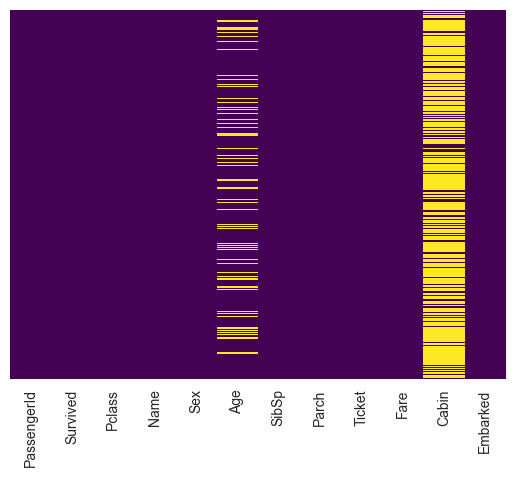

In [105]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The yellow lines indicates the missing values

<Axes: xlabel='Survived', ylabel='count'>

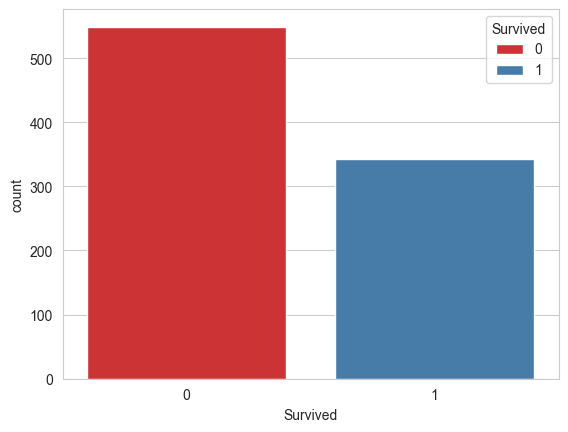

In [106]:
sns.set_style('whitegrid') #to make white grid background
sns.countplot(x = 'Survived', hue = "Survived",data = train, palette = 'Set1') 
#based on the survived column count plot will be created

<Axes: xlabel='Survived', ylabel='count'>

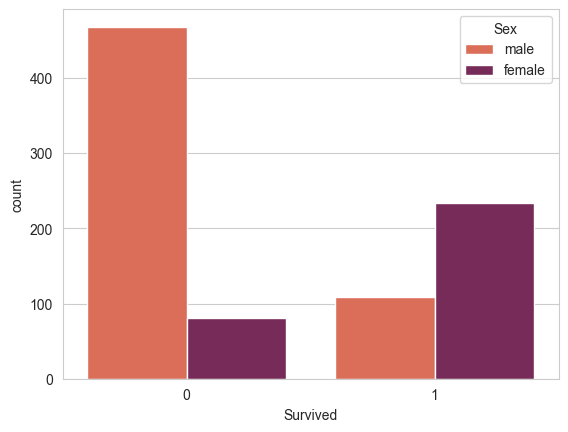

In [107]:
sns.set_style('whitegrid')
sns.countplot(x="Survived" ,hue="Sex" ,data=train,palette="rocket_r") 
#survived classifed based on gender

<Axes: xlabel='Survived', ylabel='count'>

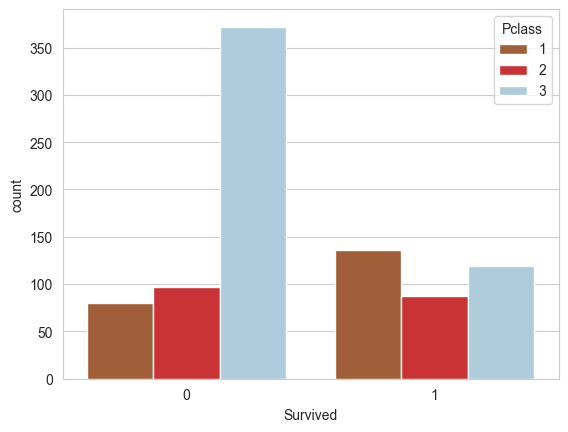

In [108]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue='Pclass',data=train,palette="Paired_r")
#survival classified based on class of passengers

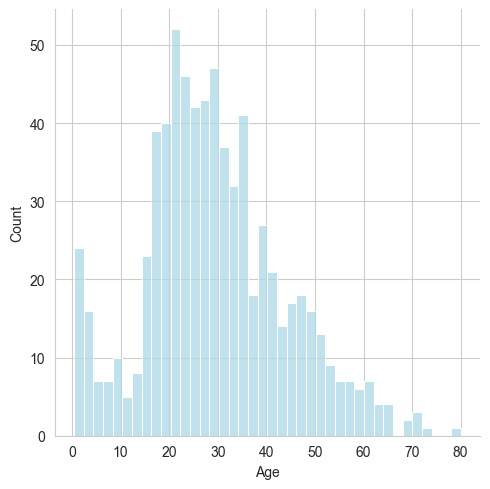

In [109]:
sns.displot(train['Age'].dropna(),kde=False,color="lightBlue",bins=40)

<Axes: >

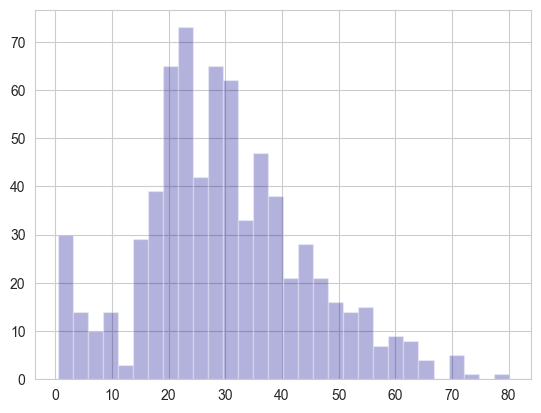

In [110]:
train['Age'].hist(bins=30,color='darkBlue',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

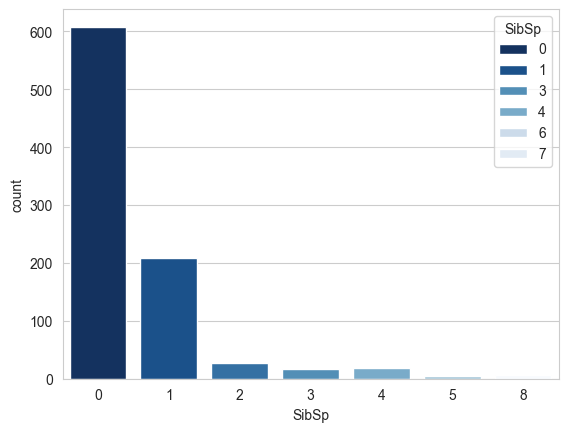

In [111]:
sns.countplot(x='SibSp',hue='SibSp',data=train,palette="Blues_r")

*

<Axes: >

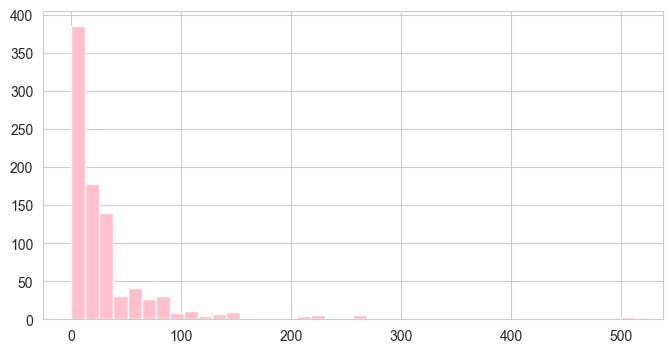

In [112]:
train['Fare'].hist(color='pink',bins=40,figsize=(8,4))

Now we are going to clean the data by filling the missing ages by the mean age of all the passengers, where we will check the average age by using passenger class.

In [113]:
plt.figure(figsize=(12,7))

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

<Axes: xlabel='Pclass', ylabel='Age'>

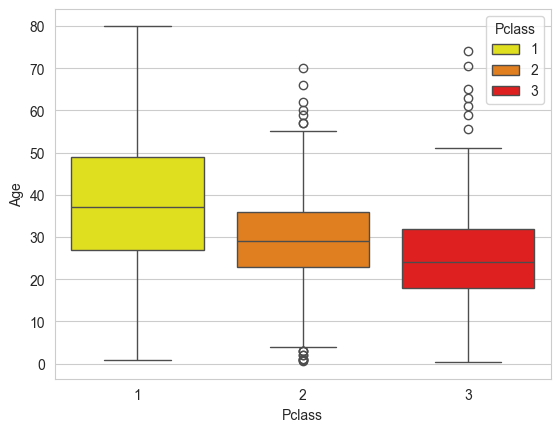

In [114]:
sns.boxplot(x='Pclass',y='Age',hue='Pclass',data=train,palette="autumn_r")

<Axes: >

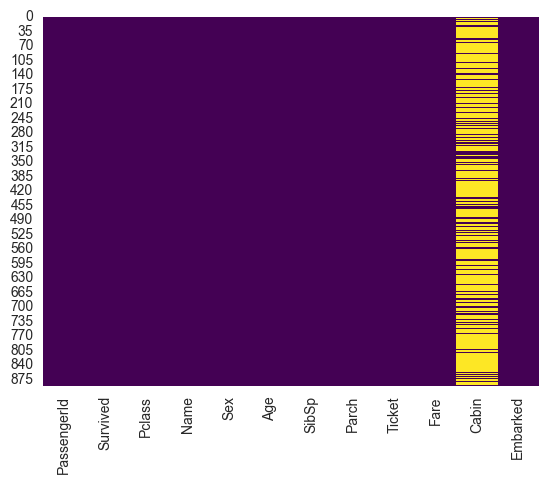

In [115]:
import pandas as pd

def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]
    SibSp = cols.iloc[2]  # Assuming SibSp is present at index 2
    Parch = cols.iloc[3]  # Assuming Parch is present at index 3

    if pd.isnull(Age):
        # Impute based on Pclass, SibSp, and Parch
        if Pclass == 1:
            age = 35  #Using average age for 1st class with at least one family member
        elif Pclass == 2:
            age = 30  #Using average age for 2nd class with at least one family member
        else:
            age = 25  #Useing average age for 3rd class with at least one family member
        return age
    else:
        return Age

# Creating a copy to avoid modifying original DataFrame
train_copy = train.copy()
# Applying imputation with optional SibSp and Parch consideration
train_copy['Age'] = train_copy[['Age', 'Pclass', 'SibSp', 'Parch']].apply(impute_age, axis=1)
# creating the heatmap
sns.heatmap(train_copy.isnull(), cbar=False, cmap='viridis')

In [116]:
import pandas as pd
pd.options.mode.chained_assignment = None

Dropping the cabin column.(NaN)

In [117]:
train.drop('Cabin',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [119]:
train.dropna(inplace=True)

now we will convert catogerical features to dummy variables using pandas so that our machine learning algorithm would be able to directly take those features as inputs.

In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [122]:
pd.get_dummies(train["Embarked"],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [127]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [128]:
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


splitting our data into training set and test set.

In [129]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [131]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [135]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   -- ------------------------------------- 0.6/10.6 MB 18.8 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/10.6 MB 21.9 MB/s eta 0:00:01
   ---------- ----------------------------- 2.7/10.6 MB 24.8 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/10.6 MB 27.4 MB/s eta 0:00:01
   ----------------- ---------------------- 4.8/10.6 MB 25.4 MB/s eta 0:00:01
   --------------------- ------------------ 5.7/10.6 MB 25.9 MB/s eta 0:00:01
   ------------------------- -------------- 6.6/10.6 MB 26.5 MB/s eta 0:00:01
   ---------------------------- ----------- 7.6/10.6 MB 27.0 MB/s eta 0:00:01
   -------------------------------- ------- 8.6/10.6 MB 27.5 MB/s eta 0:00:01
   

In [137]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

TRAINING AND PREDICTING

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [154]:
predictions = model.predict(X_test)

In [155]:
from sklearn.metrics import confusion_matrix

In [156]:
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[109,  19],
       [ 24,  62]], dtype=int64)

In [157]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7990654205607477

In [158]:
predictions

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)